In [206]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import joblib
import os

In [207]:
# Step 1: Load the dataset
df = pd.read_csv("Crop_recommendation.csv")

# Display the first few rows
display(df.head())

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


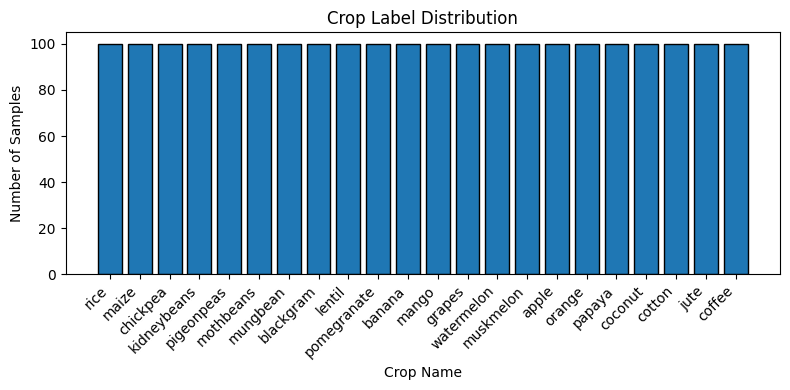

In [208]:
# Step 2: Visualize class distribution (crop names)
label_counts = df['label'].value_counts()

plt.figure(figsize=(8, 4))
plt.bar(label_counts.index, label_counts.values, edgecolor='black')
plt.xlabel("Crop Name")
plt.ylabel("Number of Samples")
plt.title("Crop Label Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [209]:
# Step 3: Check for missing values and handle them
print("Missing values per column:\n",df.isnull().sum())

# Step 4: Convert crop names (labels) to numerical values using Label Encoding
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

Missing values per column:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


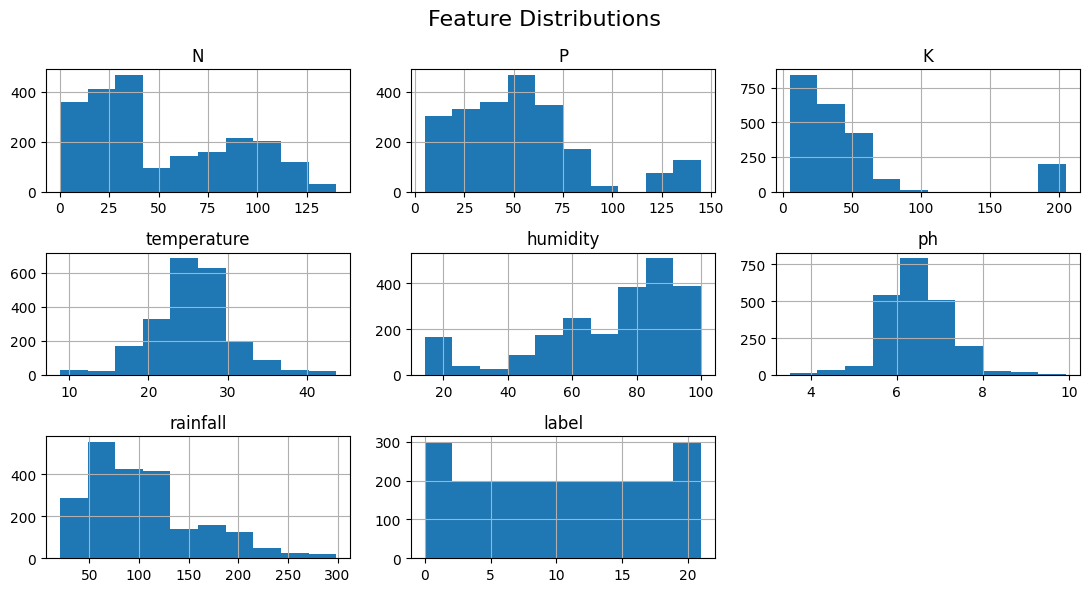

In [210]:
# Step 5: Visualize feature distributions
df.hist(figsize=(11, 6))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

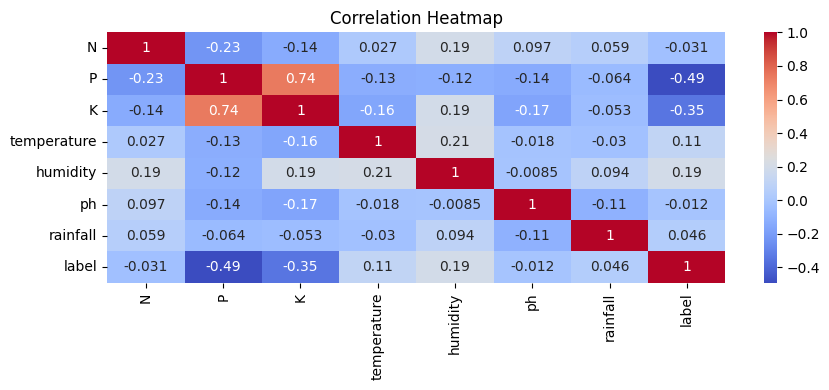

In [211]:
# Step 6: Correlation heatmap (numeric features only)
plt.figure(figsize=(9, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [212]:
# Step 7: Split dataset into features (X) and target variable (y)
X = df.drop(columns=['label'])  # Features (N, P, K, temp, humidity, ph, rainfall)
y = df['label']  # Target (crop label)

# Step 8: Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train the model using Random Forest Classifier
model = RandomForestClassifier(n_estimators=50,max_depth=8, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=50, random_state=42)

In [213]:
# Step 10: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: ", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy:  0.9931818181818182

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1

In [214]:
# Check training accuracy on the training dataset
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.9982954545454545


In [215]:
# Perform 5-fold cross-validation to check generalization
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation accuracy:", scores.mean())


Cross-validation accuracy: 0.990909090909091


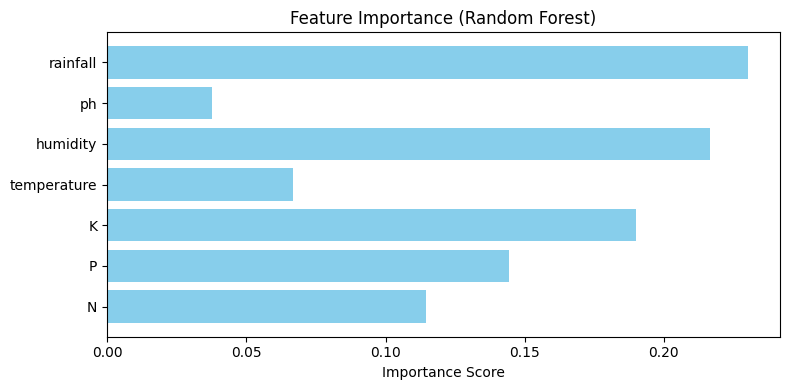

In [216]:
# Feature Importance Plot
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 4))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()